In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import json
import time
import itertools
from scipy import stats
import psycopg2 as psql
from psycopg2.extras import RealDictCursor

import sys
sys.path.append("..")
from tools.flight_projection import *
from tools.conflict_handling import *

import seaborn as sns
sns.set(color_codes=True)

try:
    conn = psql.connect("dbname='thesisdata' user='postgres' host='localhost' password='postgres'")
except Exception as e:
    print("Unable to connect to the database.")
    print(e)

/home/victor/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
cur_read = conn.cursor(cursor_factory=RealDictCursor)
cur_read.execute("SELECT * FROM public.ddr2_conflicts limit 20;")
batch = cur_read.fetchall()

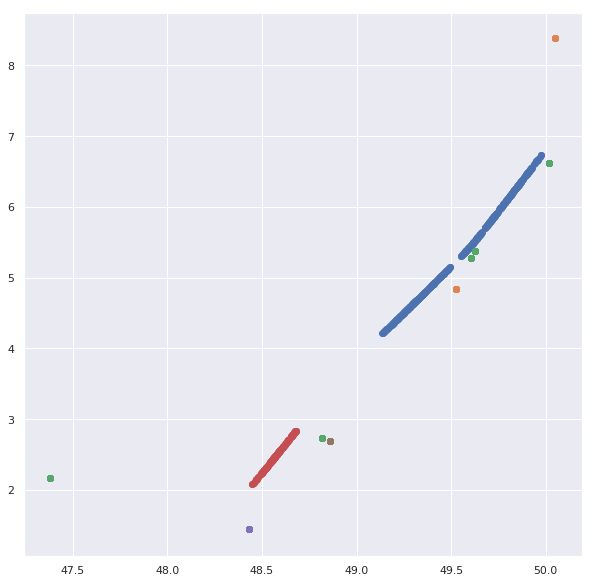

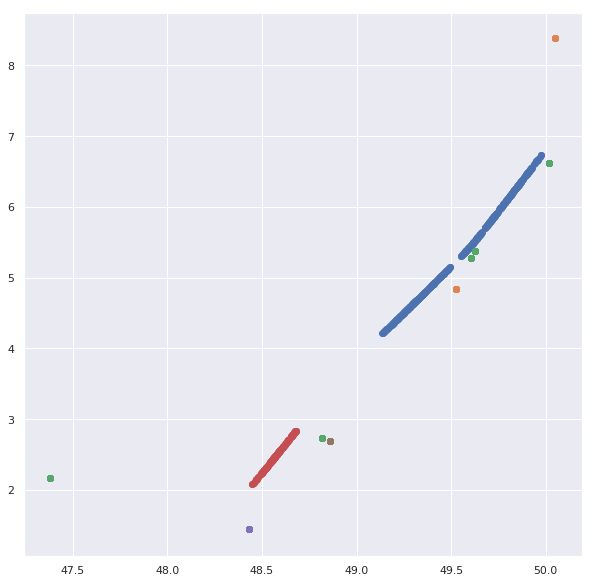

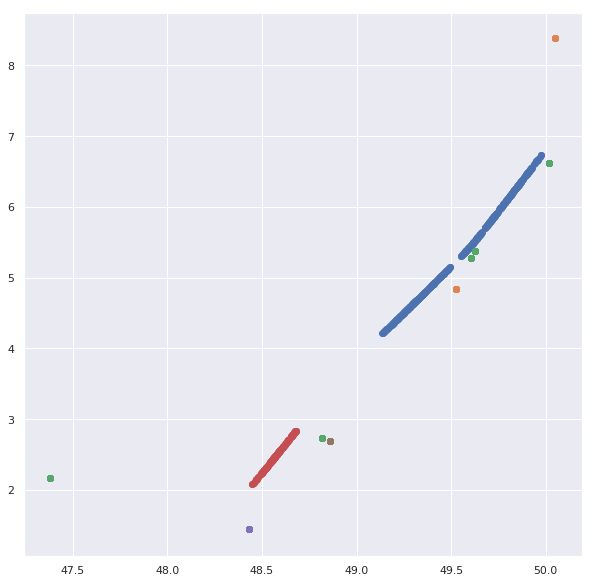

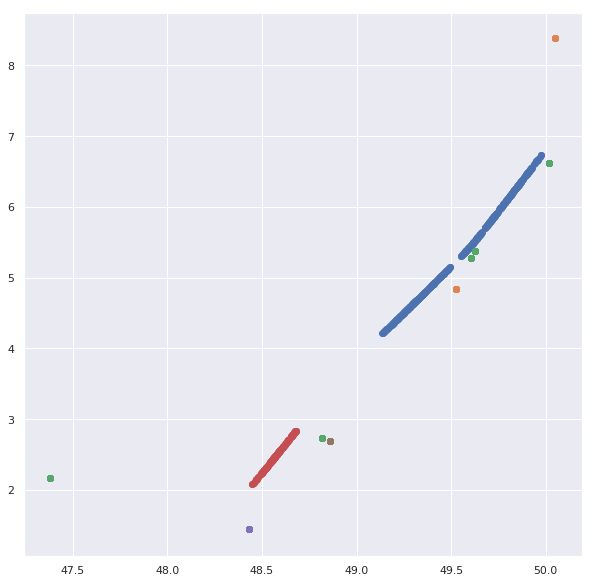

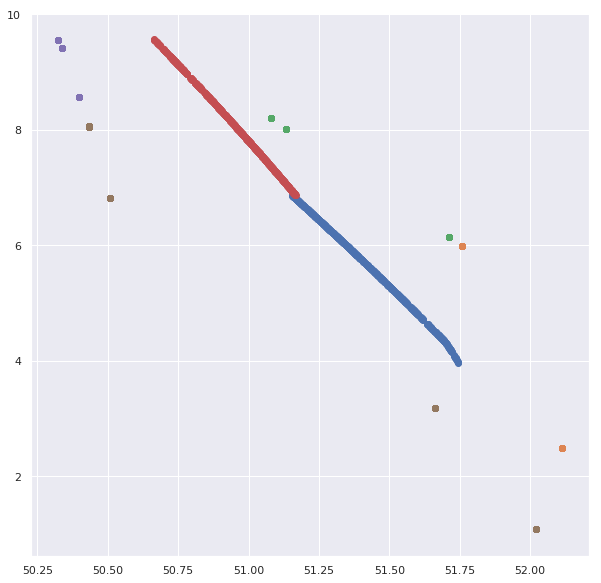

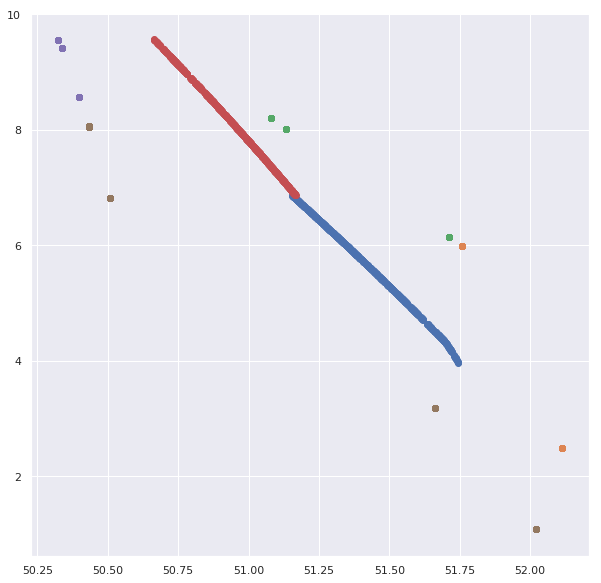

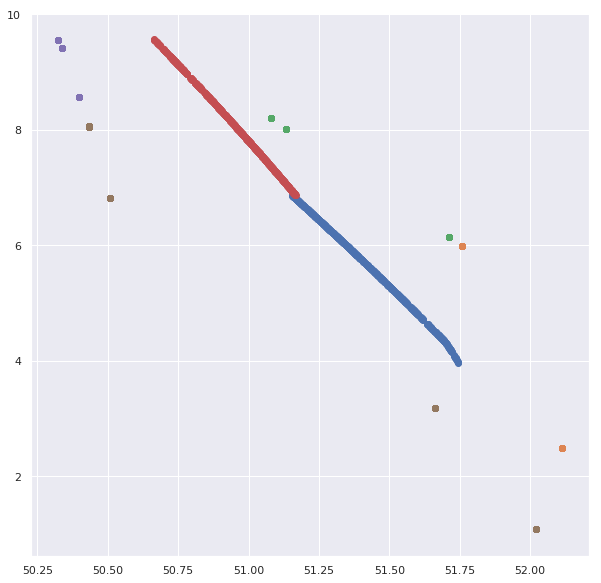

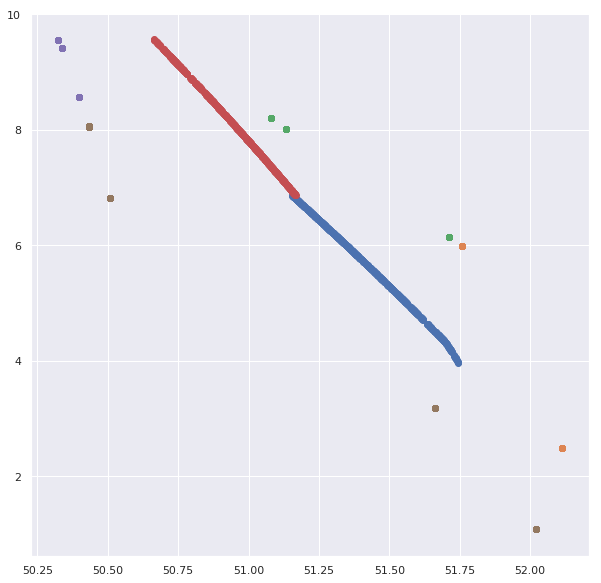

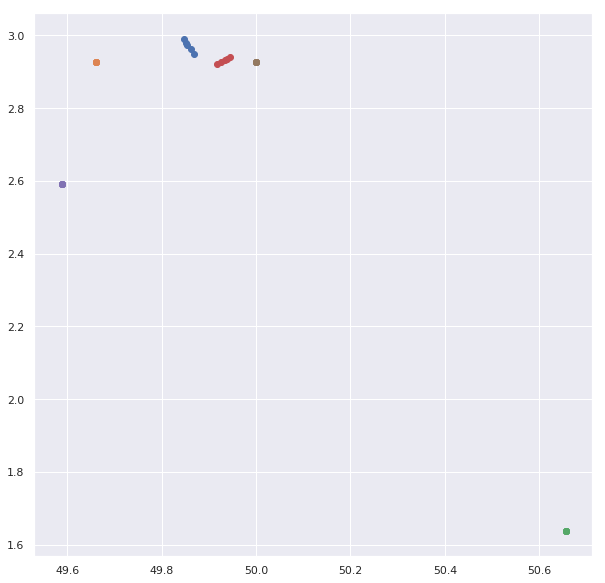

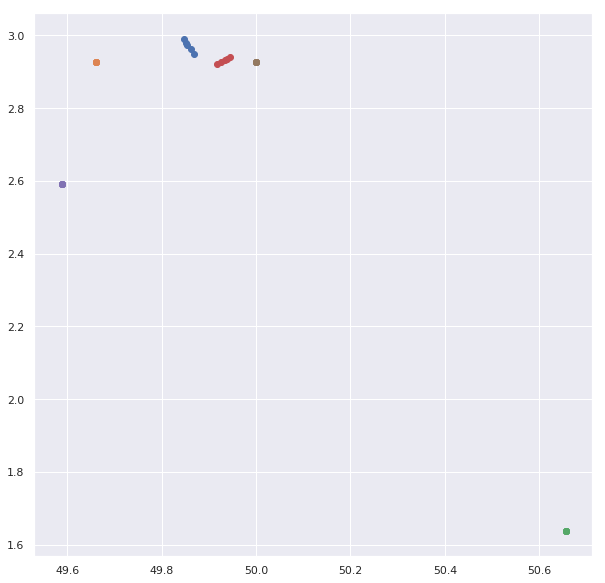

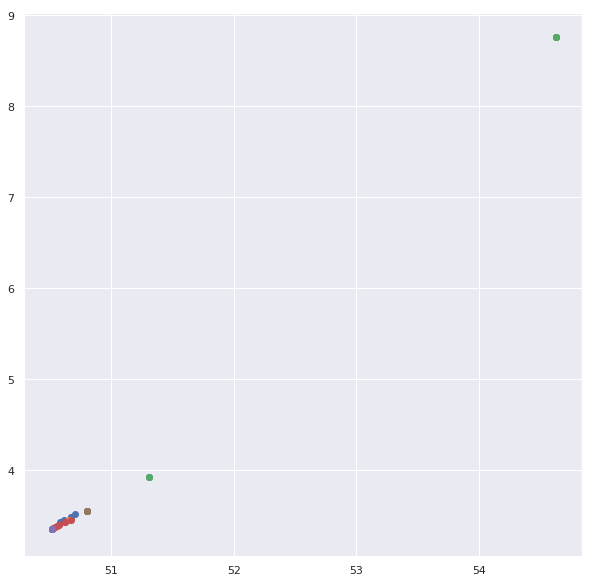

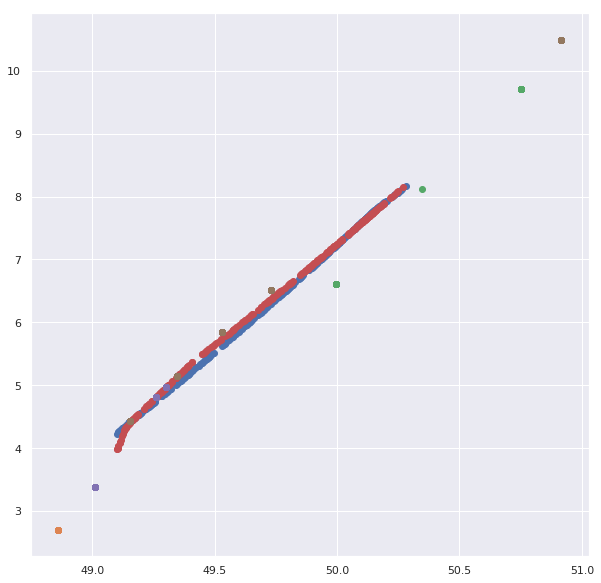

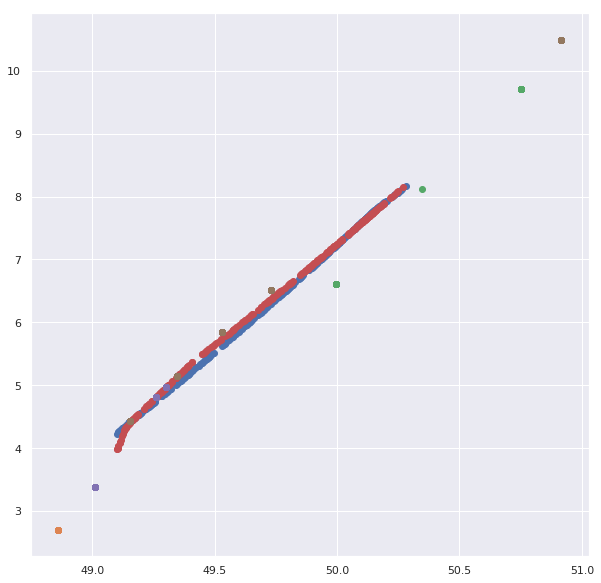

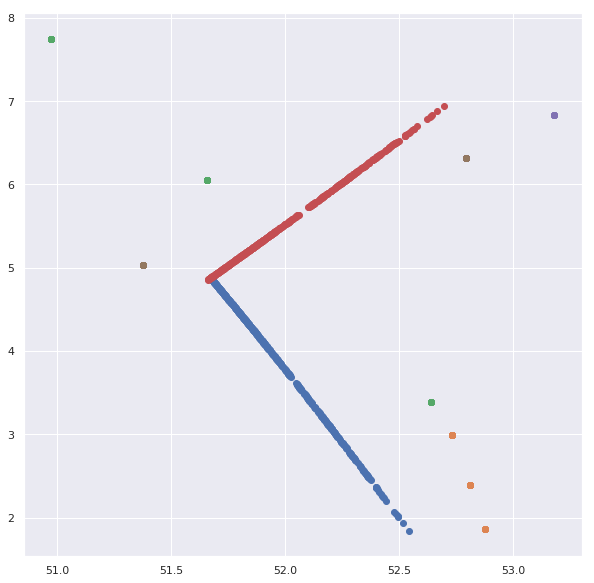

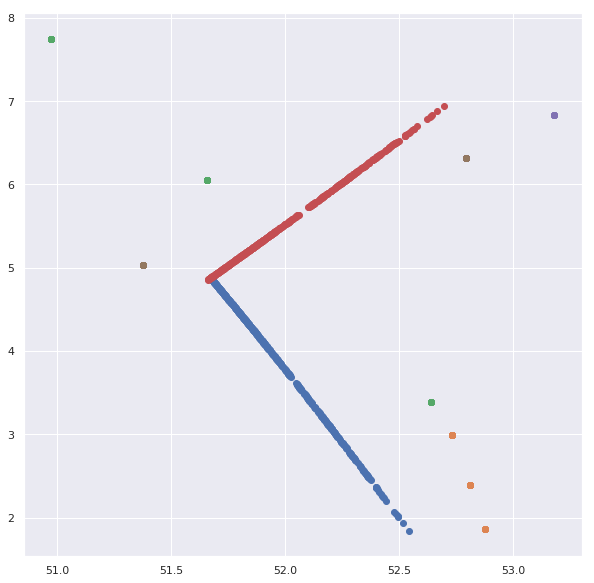

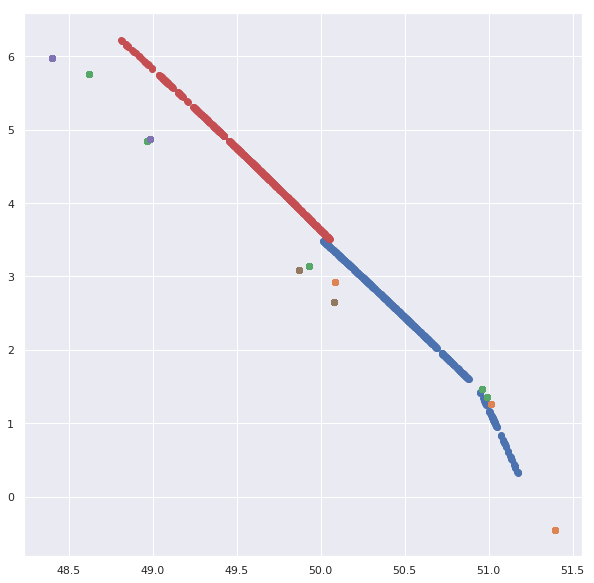

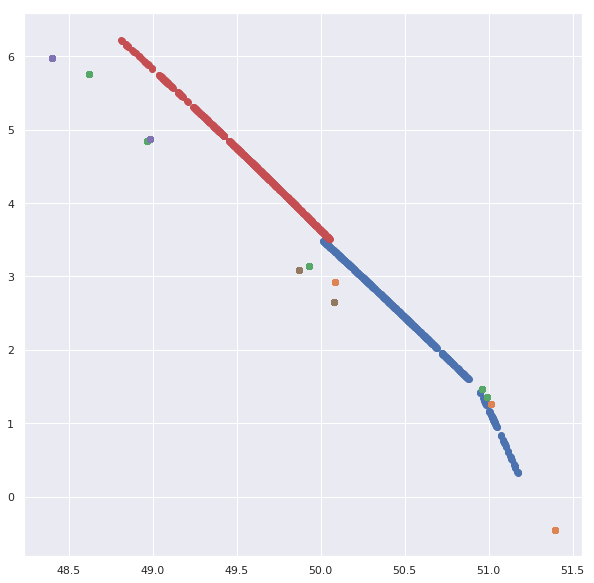

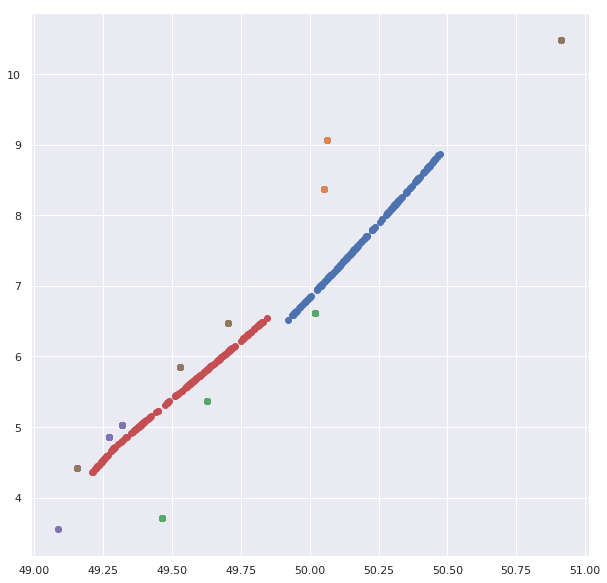

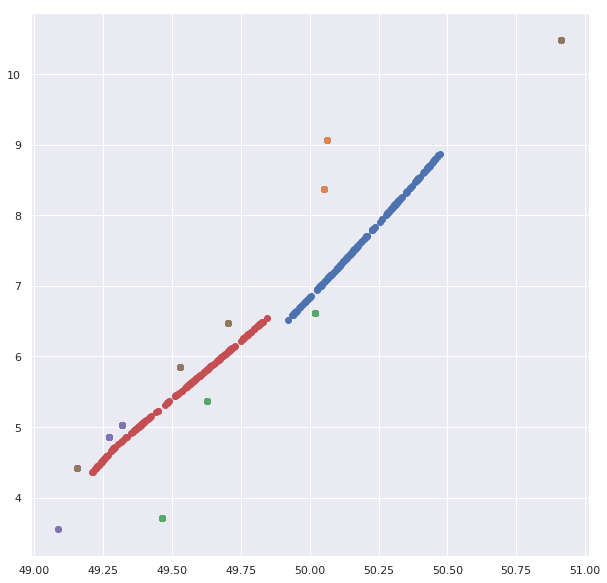

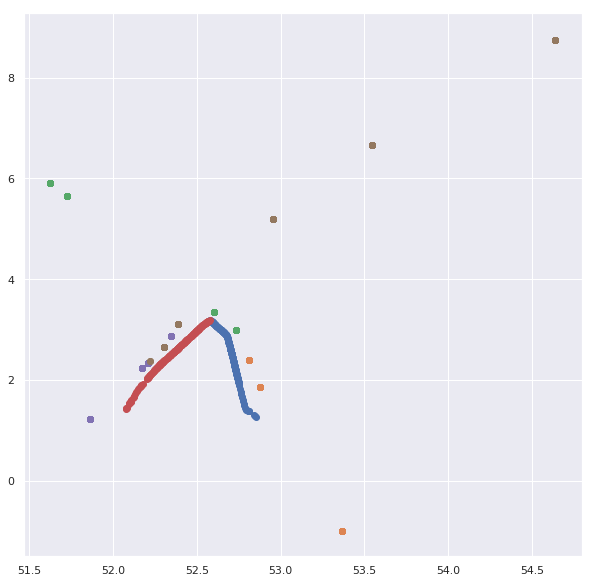

In [3]:
res_batch = []

for bi in batch:

    b = {}

    if bi:
        fl_keys = ['ts', 'lat', 'lon', 'hdg', 'alt', 'spd',
                   'roc', 'ep_seg_b', 'lat_seg_b', 'lon_seg_b', 'lat_seg_e', 'lon_seg_e',
                   'fl_seg_b', 'fl_seg_e', 'seq']

        try:
            fl1 = {}
            for k in fl_keys:
                fl1[k] = bi["%s%s" % (k, '_1')]

            try:
                fl1 = crop_ddr2_flight_seg(fl1)
            except Exception as e:
                print('Cropping DDR2 flight failed, error: ')
                print(e)
                continue

            try:
                fl1 = add_waypoint_segments(fl1)
                fl1 = fl1[fl1.wp_seg.notnull()]
            except Exception as e:
                print('Adding waypoints to flight failed, error: ')
                print(e)
                continue

            if fl1 is None:
                continue

            if len(fl1) == 0:
                continue

            fl1['hdg_int'] = fl1.apply(lambda x: calc_compass_bearing(
                                    (x['wp_seg'][2][0], x['wp_seg'][2][1]),
                                    (x['wp_seg'][2][2], x['wp_seg'][2][3])),
                                           axis=1)

            fl2 = {}

            for k in fl_keys:
                fl2[k] = bi["%s%s" % (k, '_2')]
            
            try:
                fl2 = crop_ddr2_flight_seg(fl2)
            except Exception as e:
                print('Cropping DDR2 flight failed, error: ')
                print(e)
                continue

            try:
                fl2 = add_waypoint_segments(fl2)
                fl2 = fl2[fl2.wp_seg.notnull()]
            except Exception as e:
                print('Adding waypoints to flight failed, error: ')
                print(e)
                continue

            if fl2 is None:
                continue

            if len(fl2) == 0:
                continue

            fl2['hdg_int'] = fl2.apply(lambda x: calc_compass_bearing(
                                            (x['wp_seg'][2][0], x['wp_seg'][2][1]),
                                            (x['wp_seg'][2][2], x['wp_seg'][2][3])),
                                        axis=1)

            plt.figure(figsize=(10,10))
            plt.scatter(fl1['lat'], fl1['lon'])
            plt.scatter([i[2][0] for i in fl1['wp_seg']],[i[2][1] for i in fl1['wp_seg']])
            plt.scatter([i[2][2] for i in fl1['wp_seg']],[i[2][3] for i in fl1['wp_seg']])
            plt.scatter(fl2['lat'], fl2['lon'])
            plt.scatter([i[2][0] for i in fl2['wp_seg']],[i[2][1] for i in fl2['wp_seg']])
            plt.scatter([i[2][2] for i in fl2['wp_seg']],[i[2][3] for i in fl2['wp_seg']])
            plt.show()

        except Exception as e:
            print('Preprocessing data failed, error:')
            print(e)
            continue

# return res_batch

In [7]:
fl2

,ts,lat,lon,spd,hdg,wp_seg,hdg_int
0,1.525313e+09,54.59518,9.50592,432.0,226.31,"(0, 5876.088641623721, (54.6466666666667, 9.46...",229.222609
1,1.525313e+09,54.59381,9.50342,432.0,226.31,"(0, 5886.380487980794, (54.6466666666667, 9.46...",229.222609
2,1.525313e+09,54.58997,9.49647,432.0,226.31,"(0, 5917.579555896321, (54.6466666666667, 9.46...",229.222609
3,1.525313e+09,54.58859,9.49405,432.0,226.31,"(0, 5932.040234477679, (54.6466666666667, 9.46...",229.222609
4,1.525313e+09,54.58305,9.48411,432.0,226.22,"(0, 5980.507214369075, (54.6466666666667, 9.46...",229.222609
5,1.525313e+09,54.57742,9.47388,432.0,226.22,"(0, 6024.159075469537, (54.6466666666667, 9.46...",229.222609
6,1.525313e+09,54.54524,9.41625,431.0,226.13,"(0, 6305.5526408422975, (54.6466666666667, 9.4...",229.222609
7,1.525313e+09,54.54387,9.41375,431.0,226.13,"(0, 6315.432393912797, (54.6466666666667, 9.46...",229.222609
8,1.525313e+09,54.54140,9.40931,431.0,226.13,"(0, 6336.057211898556, (54.6466666666667, 9.46...",229.222609
9,1.525313e+09,54.54002,9.40688,431.0,226.13,"(0, 6349.702993215293, (54.6466666666667, 9.46...",229.222609


In [ ]:
bi = batch[10]
b = {}

if bi:
    fl_keys = ['ts', 'lat', 'lon', 'hdg', 'alt', 'spd',
               'roc', 'ep_seg_b', 'lat_seg_b', 'lon_seg_b',
               'fl_seg_b', 'fl_seg_e', 'seq']

    fl1 = {}
    for k in fl_keys:
        fl1[k] = bi["%s%s" % (k, '_1')]
    
    first_ddr2_wp_1 = find_waypoint_index_v2((fl1['lat'][0],fl1['lon'][0]), list(zip(fl1['lat_seg_b'],fl1['lon_seg_b'])))
    last_ddr2_wp_1 = find_waypoint_index_v2((fl1['lat'][-1],fl1['lon'][-1]), list(zip(fl1['lat_seg_b'],fl1['lon_seg_b'])))
    
    for kd in ['ep_seg_b', 'lat_seg_b', 'lon_seg_b','fl_seg_b', 'fl_seg_e', 'seq']:
        fl1[kd] = fl1[kd][first_ddr2_wp_1:last_ddr2_wp_1+2]

    fl2 = {}
    for k2 in fl_keys:
        fl2[k2] = bi["%s%s" % (k2, '_2')]
    
    first_ddr2_wp_2 = find_waypoint_index_v2((fl2['lat'][0],fl2['lon'][0]), list(zip(fl2['lat_seg_b'],fl2['lon_seg_b'])))
    last_ddr2_wp_2 = find_waypoint_index_v2((fl2['lat'][-1],fl2['lon'][-1]), list(zip(fl2['lat_seg_b'],fl2['lon_seg_b'])))
    
    for kd in ['ep_seg_b', 'lat_seg_b', 'lon_seg_b','fl_seg_b', 'fl_seg_e', 'seq']:
        fl2[kd] = fl2[kd][first_ddr2_wp_2:last_ddr2_wp_2+2]
    

In [ ]:
plt.figure(figsize=(20,20))

plt.scatter(list(fl1['lat']),list(fl1['lon']), c="b", s=2)
plt.scatter(fl1['lat'][0],fl1['lon'][0], c="b", s=20)
plt.scatter(fl1['lat_seg_b'][0],fl1['lon_seg_b'][0], c="b", s=20)
plt.plot(list(fl1['lat_seg_b']),list(fl1['lon_seg_b']))
plt.scatter(list(fl2['lat']),list(fl2['lon']), c="r", s=2)
plt.scatter(fl2['lat'][0],fl2['lon'][0], c="b", s=20)
plt.plot(list(fl2['lat_seg_b']),list(fl2['lon_seg_b']))
plt.scatter(fl2['lat_seg_b'][0],fl2['lon_seg_b'][0], c="b", s=20)

# plt.scatter(list(fl1['lon']),list(fl1['lat']), c="b", s=2)
# plt.scatter(fl1['lon'][0],fl1['lat'][0], c="b", s=20)
# plt.scatter(fl1['curr_lon'][0],fl1['curr_lat'][0], c="b", s=20)
# plt.plot(list(fl1['curr_lon']),list(fl1['curr_lat']))
# plt.scatter(list(fl2['lon']),list(fl2['lat']), c="r", s=2)
# plt.scatter(fl2['lon'][0],fl2['lat'][0], c="b", s=20)
# plt.plot(list(fl2['curr_lon']),list(fl2['curr_lat']))
# plt.scatter(fl2['curr_lon'][0],fl2['curr_lat'][0], c="b", s=20)

# plt.xlim(tuple(lon_bounds))
# plt.ylim(tuple(lat_bounds))
plt.show()

In [ ]:
preprocessed_batch = preprocess_intent_conflicts(batch)

ttc_est, ttc_act, ttca_bin, ttce_bin = process_flight_batch(preprocessed_batch)
    
perf_dict = create_performance_dict(ttc_act, ttc_est)

# try:
#                 for t in range(len(b['ts_1'])):

#                         b['ttc'].append(b['ts_1'][-1] - b['ts_1'][t])
#                         b['ettc'].append(ttc_est(fl1['lat'][t], fl1['lon'][t], fl2['lat'][t], fl2['lon'][t], 
#                                              fl1['hdg_int'][t], fl2['hdg_int'][t], fl1['spd'][t], fl2['spd'][t]))
#                 b['ttc_diff'] = [x-y for x,y in zip(b['ttc'],b['ettc'])]
#             except:
#                 continue

#             for tt in range(int(la_time/bin_sec)):
#                 bmin = tt*bin_sec
#                 bmax = (tt+1)*bin_sec
#                 if str(bmax) not in list(bin_dp_df.keys()):
#                     bin_dp_df[str(bmax)] = []

#                 bin_dp_df[str(bmax)].extend([e for e,t in zip(b['ttc_diff'], b['ttc']) 
#                                                     if t >= bmin and t <= bmax])


#             plt.plot(b['ttc'], b['ettc'])
#     plt.show()

In [ ]:
perf_dict

In [ ]:
box_data = []

bin_df = bin_dp_df

for k in [kx for kx in bin_df.keys() if int(kx) <= 1200]:
    box_data.append((int(k), [i for i in bin_df[k] if not np.isnan(i)]))
    
box_data_sort = sorted(box_data, key=lambda tup: tup[0])
box_data_2 = [i[1] for i in box_data_sort]

x = range(len(box_data_2))

plt.figure(figsize=(20,8))
plt.boxplot(box_data_2, showfliers=False, patch_artist=True, whis=[5,95])
plt.xticks(x, [i[0] for i in box_data_sort])
plt.xticks(rotation=70)
plt.xlabel('Look-ahead time (seconds)')
plt.ylabel('TTC difference in seconds')
plt.title('Evolution of TTC error over look-ahead time')
plt.show()
        

In [ ]:
save_obj(bin_df,'intent_dict')

In [ ]:
import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
cur_read.close()

In [ ]:
conn.close()